### Retail sales analysis using Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_csv("project_data/project_transactions.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
transactions.columns = transactions.columns.str.lower()

In [5]:
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   basket_id          int64  
 2   day                int64  
 3   product_id         int64  
 4   quantity           int64  
 5   sales_value        float64
 6   store_id           int64  
 7   retail_disc        float64
 8   week_no            int64  
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [7]:
transactions.isna().sum()

household_key        0
basket_id            0
day                  0
product_id           0
quantity             0
sales_value          0
store_id             0
retail_disc          0
week_no              0
coupon_disc          0
coupon_match_disc    0
dtype: int64

In [8]:
#There is no missing data.

In [9]:
transactions["household_key"].nunique()

2099

In [10]:
transactions["product_id"].nunique()

84138

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).



In [11]:
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [12]:
transactions["total_discount"] = transactions["retail_disc"] + transactions["coupon_disc"]

transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,total_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79


In [13]:
transactions["pct_discount"] = (transactions["total_discount"] / transactions["sales_value"]).abs()

transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.316667


In [14]:
transactions["pct_discount"] = (np.where(transactions["pct_discount"] <= 0.0, 0, 
         np.where(transactions["pct_discount"] > 1, 1,transactions["pct_discount"]))
)

In [15]:
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.000000


In [16]:
#transactions.drop(["retail_disc", "coupon_disc", "coupon_match_disc"], axis = 1, inplace = True)

In [17]:
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.000000


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [18]:
#total_sales

total_sales = transactions["sales_value"].sum() 

total_sales

6666243.499999999

In [19]:
#total_discount

total_discount = transactions["total_discount"].sum()  

total_discount

-1178658.0799999998

In [20]:
#overall_discount_pct

overall_pct_discount = abs(total_discount / total_sales)

overall_pct_discount

0.1768099350106248

In [21]:
#total_quantity_sold

total_quantity_sold = transactions["quantity"].sum()

total_quantity_sold

216713611

In [22]:
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.000000


In [23]:
mask = (transactions["quantity"] == transactions["quantity"].max())

transactions[mask]

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,total_discount,pct_discount
1442095,630,34749153595,503,6534178,89638,250.0,384,-13.45,73,0.0,0.0,-13.45,0.0538


In [24]:
#product_id 6534178 is highest selling and has only 5% discount. No ,the discount is less.

In [25]:
#sales_value per unique basket

(total_sales / transactions["basket_id"].nunique()).round(2)

28.62

In [26]:
#sales_value per unique household

In [27]:
(total_sales / transactions["household_key"].nunique()).round(2)

3175.91

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


In [28]:
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.000000


In [29]:
tt = transactions.groupby("household_key",as_index = False).agg({"sales_value" : "sum"})

tt.head()

,household_key,sales_value
0,1,4330.16
1,2,1954.34
2,3,2653.21
3,4,1200.11
4,5,779.06


<AxesSubplot:xlabel='household_key'>

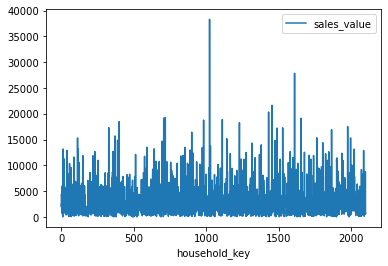

In [30]:
tt.set_index("household_key").plot()

In [31]:
(transactions
.groupby("household_key",as_index = False)
.agg({"quantity" : "sum"})
.sort_values(by="quantity",ascending= False)
.head(10)
)

,household_key,quantity
1022,1023,4479917
754,755,3141769
1608,1609,2146715
12,13,1863829
1429,1430,1741892
1526,1527,1734632
1761,1762,1669880
706,707,1640193
1028,1029,1496204
1313,1314,1492863


In [32]:
top_10= (transactions
.groupby("household_key",as_index = False)
.agg({"sales_value" : "sum"})
.sort_values(by="sales_value",ascending= False)
.head(10)
)

top_10

,household_key,sales_value
1022,1023,38319.79
1608,1609,27859.68
1452,1453,21661.29
1429,1430,20352.99
717,718,19299.86
706,707,19194.42
1652,1653,19153.75
1110,1111,18894.72
981,982,18790.34
399,400,18494.14


<AxesSubplot:xlabel='household_key'>

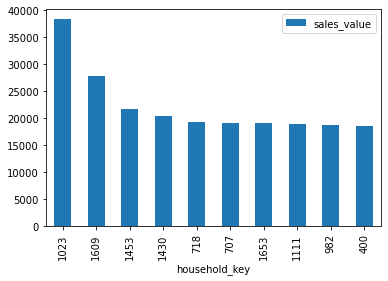

In [132]:
top_10.set_index("household_key").plot.bar()